In [1]:
# Importing necessary libraries for data handling, mathematical operations, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
# Einlesen des Trainingdatensatzes ohne Lücken
url_train = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/0_DataPreparation/train_data_no_missing_data.csv"
train_data_nmd = pd.read_csv(url_train, usecols=['Datum', 'Warengruppe', 'Temperatur_Kategorie', 'Jahreszeit_FSHW', 'FerienSH', 'Feiertag', 'Weihnachtsmarkt', 'Wochenende', 'Umsatz'])

df = train_data_nmd

df.head()

df = df.drop('Datum', axis=1)

df['Temperatur_Kategorie'] = df['Temperatur_Kategorie'].fillna('Niedrig')
df['Temperatur_Kategorie'] = df['Temperatur_Kategorie'].replace('0.0', 'Niedrig')

df['Jahreszeit_FSHW'] = df['Jahreszeit_FSHW'].astype(str)
df['Jahreszeit_Temperatur'] = (df['Jahreszeit_FSHW'] + df['Temperatur_Kategorie']).astype(str)
df = df.drop('Jahreszeit_FSHW', axis=1)
df = df.drop('Temperatur_Kategorie', axis=1)

dummies = pd.get_dummies(df['Warengruppe'], prefix='Warengruppe')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Warengruppe', axis=1)
df = df.replace({True: 1, False: 0})

df = df.drop('Warengruppe_0', axis=1)

dummies = pd.get_dummies(df['Jahreszeit_Temperatur'], prefix='Jahreszeit_Temperatur')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Jahreszeit_Temperatur', axis=1)
df = df.replace({True: 1, False: 0})

pd.set_option('display.max_columns', None)
df.head()



/tmp/ipykernel_43961/3150620045.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})
/tmp/ipykernel_43961/3150620045.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Umsatz,FerienSH,Feiertag,Weihnachtsmarkt,Wochenende,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Jahreszeit_Temperatur_1Hoch,Jahreszeit_Temperatur_1Mittel,Jahreszeit_Temperatur_1Niedrig,Jahreszeit_Temperatur_2Hoch,Jahreszeit_Temperatur_2Mittel,Jahreszeit_Temperatur_3Hoch,Jahreszeit_Temperatur_3Mittel,Jahreszeit_Temperatur_3Niedrig,Jahreszeit_Temperatur_4Mittel,Jahreszeit_Temperatur_4Niedrig
0,148.828353,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,535.856285,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,201.198426,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,65.890169,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,317.475875,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [3]:
# Importieren der benötigten Bibliotheken
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Definieren der unabhängigen Variablen (Features) und der abhängigen Variable (Ziel)
X = df.drop('Umsatz', axis=1)
y = df['Umsatz']

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des linearen Regressionsmodells
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten machen
predictions = model.predict(X_test)

# Ausgabe der Modellparameter
print(f'Koeffizienten: {model.coef_}')
print(f'y-Achsenabschnitt: {model.intercept_}')

# Berechnung des Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

X_test.head(3)

Koeffizienten: [ 4.01830776e+01  9.10906696e+01 -7.25100886e+00  5.24053555e+01
  9.99527599e+01  3.89812761e+02  1.42753675e+02  6.80042819e+01
  2.59061167e+02  7.53707701e+01 -1.51310585e+14 -1.51310585e+14
 -1.51310585e+14 -1.51310585e+14 -1.51310585e+14 -1.51310585e+14
 -1.51310585e+14 -1.51310585e+14 -1.51310585e+14 -1.51310585e+14]
y-Achsenabschnitt: 151310585095729.97
Mean Squared Error: 5583.109566266471


,FerienSH,Feiertag,Weihnachtsmarkt,Wochenende,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Jahreszeit_Temperatur_1Hoch,Jahreszeit_Temperatur_1Mittel,Jahreszeit_Temperatur_1Niedrig,Jahreszeit_Temperatur_2Hoch,Jahreszeit_Temperatur_2Mittel,Jahreszeit_Temperatur_3Hoch,Jahreszeit_Temperatur_3Mittel,Jahreszeit_Temperatur_3Niedrig,Jahreszeit_Temperatur_4Mittel,Jahreszeit_Temperatur_4Niedrig
2338,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6886,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5861,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


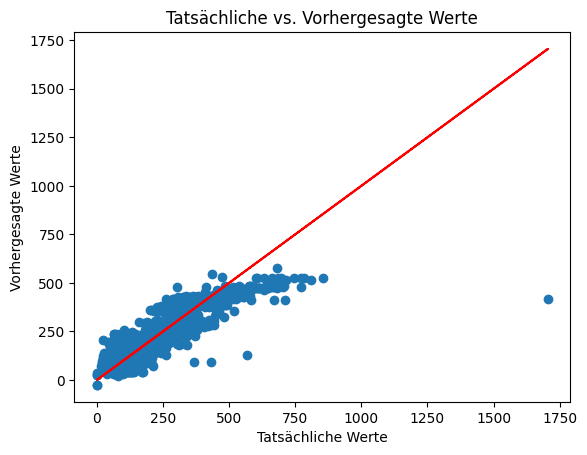

In [4]:
import matplotlib.pyplot as plt

# Erstellen Sie ein Streudiagramm der tatsächlichen gegen die vorhergesagten Werte
plt.scatter(y_test, predictions)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Tatsächliche vs. Vorhergesagte Werte')

# Zeichnen Sie eine Linie für die perfekte Vorhersage
plt.plot(y_test, y_test, color='red')

plt.show()